In [1]:
from makiflow.layers import *
import makiflow as mf

import pandas as pd
import tensorflow as tf
import numpy as np
import glob
import cv2
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import os
from glob import glob

from makiflow.metrics import confusion_mat

In [2]:
root, dirs, _ = next(os.walk('../Result'))

In [3]:
dirs

['13',
 '8',
 '0',
 '4',
 '10',
 '.ipynb_checkpoints',
 '2',
 '3',
 '5',
 '9',
 '6',
 '7',
 '31',
 '21',
 '15',
 '1']

In [4]:
validated_images = []
predicted_images = []
original_images = []

for directory in dirs:
    if directory == '.ipynb_checkpoints':
        continue
    p_glob = glob(f'{root}/{directory}/*0.bmp')
    p_glob.sort()
    
    print(directory)
    image = np.zeros((1024, 1024))
    predicted = np.zeros((1024, 1024))
    o_img = cv2.imread(f'{root}/{directory}/image.bmp')
    original_images.append(o_img)

    for p_img_name in p_glob:
        v_img_name = p_img_name.replace('0.bmp', '0r.bmp')
        
        p_img = cv2.imread(p_img_name)[..., 0]
        try:
            v_img = cv2.imread(v_img_name)[..., 0]
        except:
            v_img = np.zeros(p_img.shape)

        assert (v_img.shape == p_img.shape)

        v_img[v_img < 180] = 0
        v_img[v_img >= 180] = int(v_img_name[-7:-6])
#         v_img[v_img == 255] = int(v_img_name[-7:-6])
        p_img[p_img == 255] = int(v_img_name[-7:-6])
        
        image *= v_img == 0
        image += v_img
        predicted += p_img
        
    validated_images.append(image)
    predicted_images.append(predicted)

13
8
0
4
10
2
3
5
9
6
7
31
21
15
1


In [5]:
print(f'validated images: {np.unique(np.array(validated_images), return_counts=True)}, \n' +  
      f'predicted images: {np.unique(np.array(predicted_images), return_counts=True)}')

validated images: (array([0., 1., 2., 3., 4., 5., 6., 7., 9.]), array([13462357,   294204,   105551,  1569278,     6520,   127349,
          41574,     3406,   118401])), 
predicted images: (array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([13510267,   318127,   167558,  1500158,       71,   120234,
           7729,      569,      151,   103776]))


In [6]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
conf = confusion_matrix(np.array(validated_images).flatten(), np.array(predicted_images).flatten())
# recall = recall_score(np.array(validated_images).flatten(), np.array(predicted_images).flatten(), average=None)
# precision = precision_score(np.array(validated_images).flatten(), np.array(predicted_images).flatten(), average=None)

In [7]:
precision, recall

NameError: name 'precision' is not defined

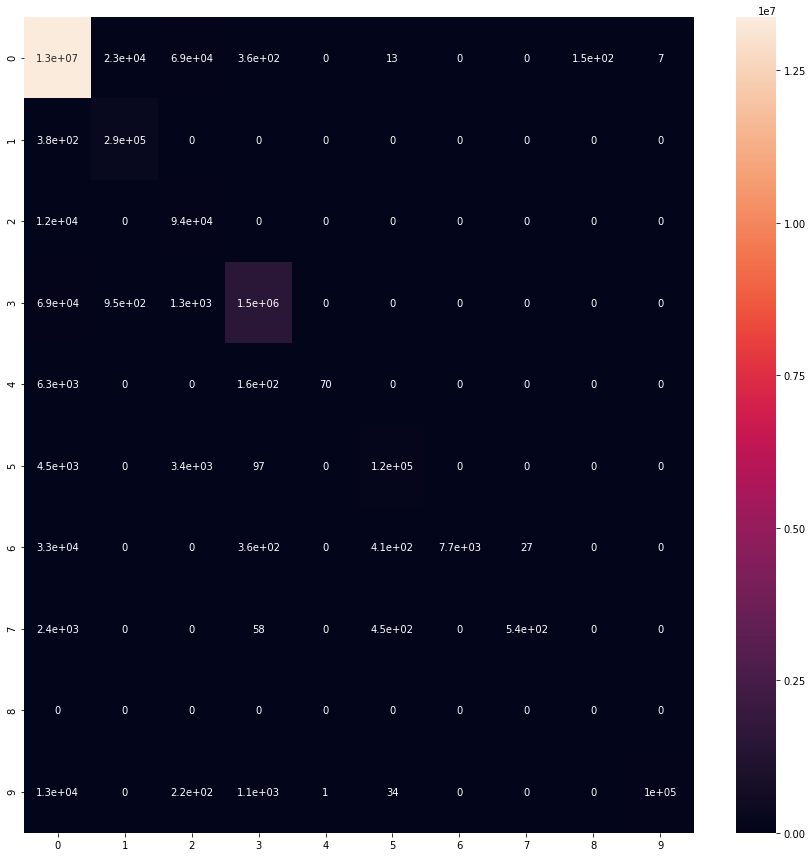

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(conf, annot=True)

In [9]:
conf_mat = confusion_mat(np.array(predicted_images), np.array(validated_images), to_flatten=True, normalize=[], save_path='res.png')
conf_mat, _ = confusion_mat(np.array(predicted_images), np.array(validated_images), to_flatten=True, save_path='res_conf.png')
# df = pd.DataFrame(conf_mat)
# df.to_excel('table_2.xls')

/home/rustam/anaconda3/lib/python3.6/site-packages/makiflow/metrics/metrics.py:181: RuntimeWarning: invalid value encountered in true_divide
  temp_mat = (mat.T / mat.sum(axis=1)).T


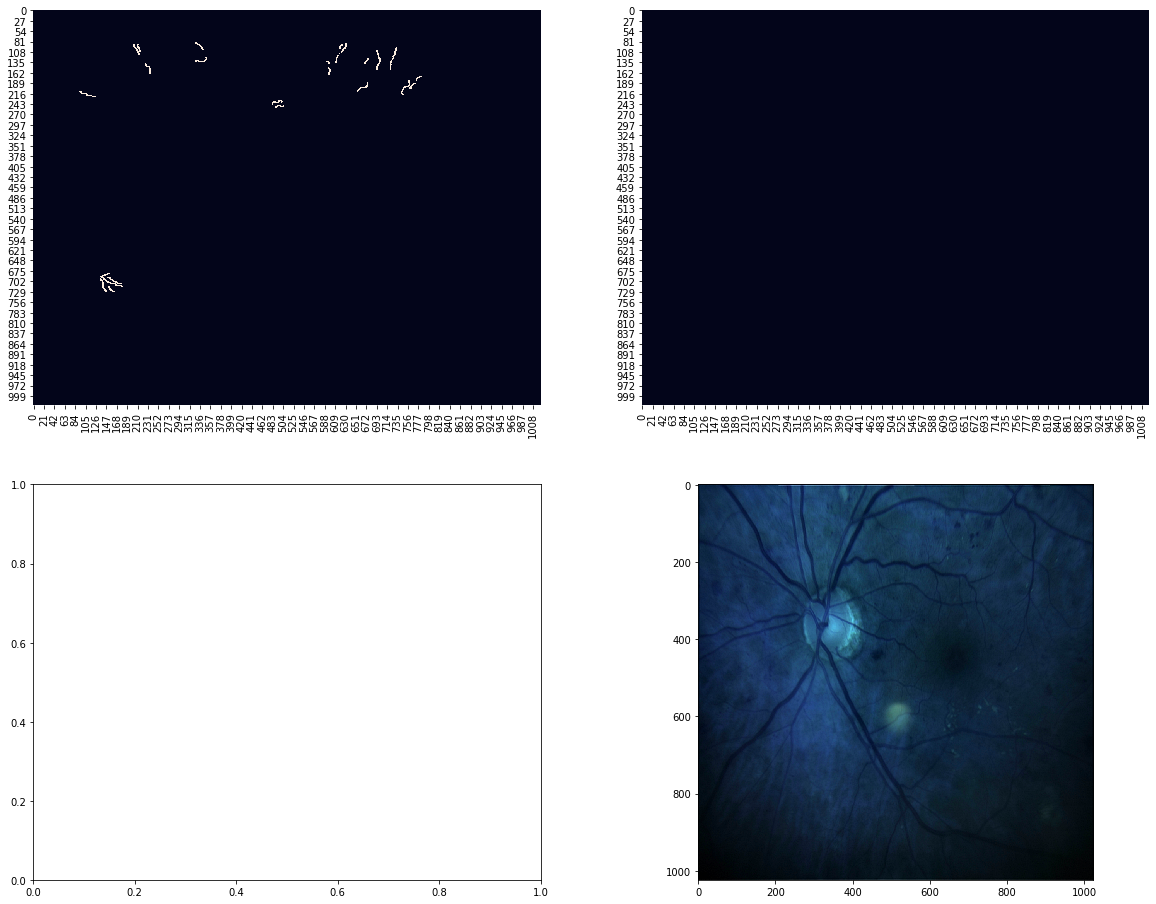

In [28]:
i = 11
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 16))
# plt.imshow(validated_imgs[0])
sns.heatmap(validated_images[i] == 4, vmin=0, vmax=1, ax=axs[0, 0], cbar=False)
sns.heatmap(predicted_images[i] == 4, vmin=0, vmax=1, ax=axs[0, 1], cbar=False)
plt.imshow(original_images[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


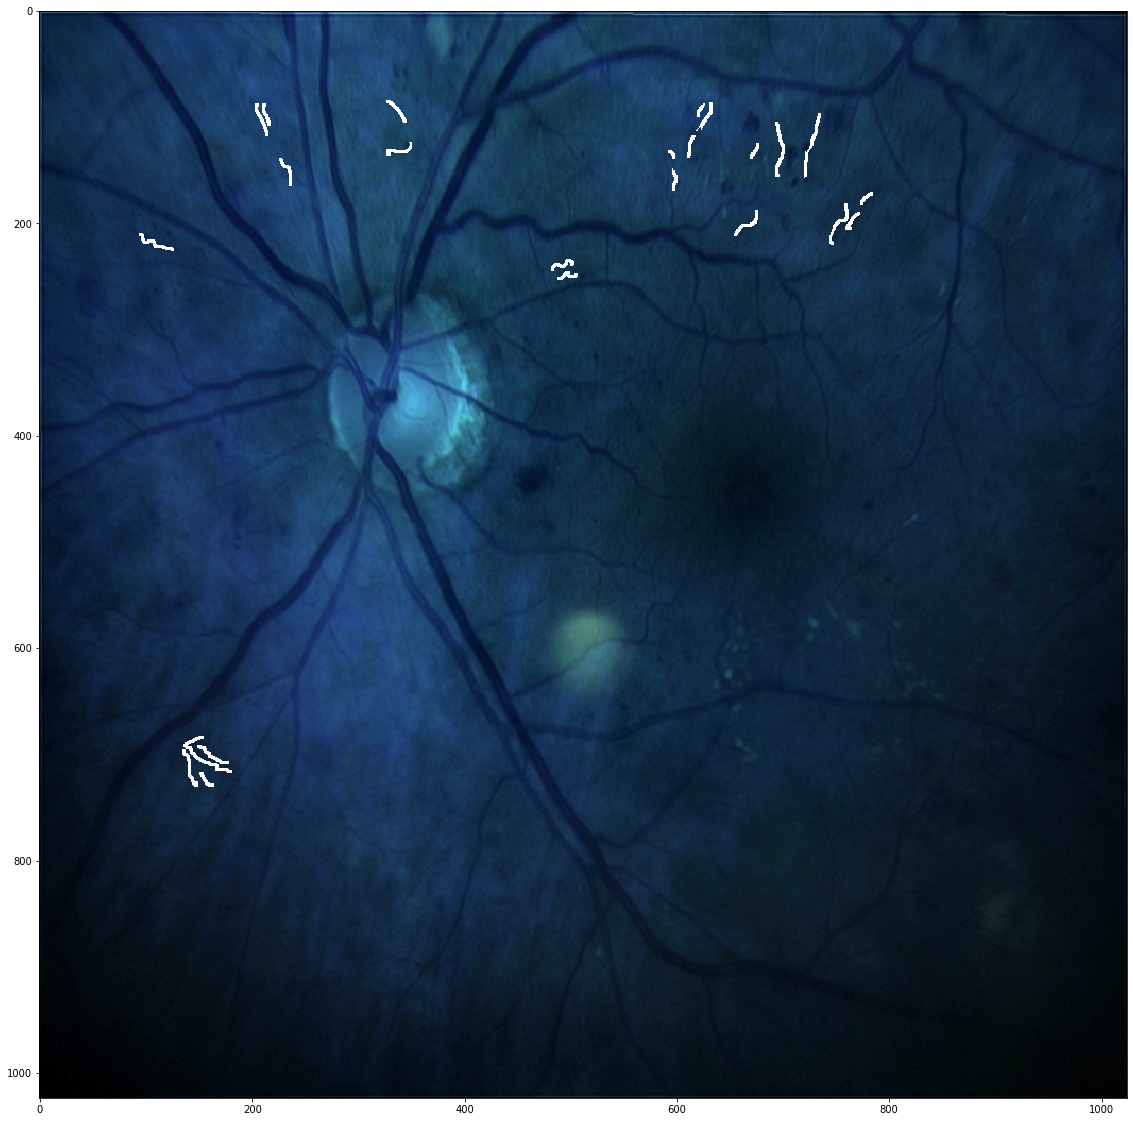

In [29]:
v_img = (validated_images[i] == 4) * 255
v_img = np.concatenate((v_img[:, :, np.newaxis], v_img[:, :, np.newaxis], v_img[:, :, np.newaxis]), axis=2)
plt.figure(figsize=(30, 20))
plt.imshow(original_images[i] + v_img )
plt.imsave('with_4.png', np.array(original_images[i] * (v_img != 255) + v_img, dtype=np.uint8))
plt.imsave('without.png', original_images[i])

In [114]:
np.unique(v_img)

array([  0, 255])

In [135]:
def load_data(path_to_data='/mnt/data/med_data/all_data'):
    Xtrain = []
    Ytrain = []

    masks = glob(f'{path_to_data}/masks/*.bmp')
    i = 0
    masks.sort()
    for mask_name in tqdm(masks):
        img = cv2.imread(mask_name.replace('masks', 'images'))
        mask = cv2.imread(mask_name)
        
        if [4] in np.unique(mask):
            print(f'{i}: {mask_name}')
        else:
            continue
        i += 1
        
        img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_CUBIC)
        mask = cv2.resize(mask, (1024, 1024), interpolation=cv2.INTER_NEAREST)
        
        Xtrain.append(img)
        Ytrain.append(mask[:, :, 0])
        
    return Xtrain, Ytrain

In [136]:
x, y = load_data()

 10%|█         | 12/115 [00:00<00:05, 18.59it/s]

0: /mnt/data/med_data/all_data/masks/105.bmp
1: /mnt/data/med_data/all_data/masks/108.bmp


 15%|█▍        | 17/115 [00:00<00:05, 19.31it/s]

2: /mnt/data/med_data/all_data/masks/11.bmp
3: /mnt/data/med_data/all_data/masks/110.bmp


 23%|██▎       | 26/115 [00:01<00:03, 22.97it/s]

4: /mnt/data/med_data/all_data/masks/14.bmp


 31%|███▏      | 36/115 [00:01<00:03, 23.97it/s]

5: /mnt/data/med_data/all_data/masks/25.bmp
6: /mnt/data/med_data/all_data/masks/26.bmp


 34%|███▍      | 39/115 [00:01<00:03, 20.78it/s]

7: /mnt/data/med_data/all_data/masks/29.bmp
8: /mnt/data/med_data/all_data/masks/3.bmp
9: /mnt/data/med_data/all_data/masks/30.bmp


 45%|████▌     | 52/115 [00:02<00:03, 18.16it/s]

10: /mnt/data/med_data/all_data/masks/4.bmp


 73%|███████▎  | 84/115 [00:03<00:01, 26.99it/s]

11: /mnt/data/med_data/all_data/masks/69.bmp


 79%|███████▉  | 91/115 [00:04<00:00, 25.25it/s]

12: /mnt/data/med_data/all_data/masks/76.bmp


 84%|████████▍ | 97/115 [00:04<00:00, 20.24it/s]

13: /mnt/data/med_data/all_data/masks/81.bmp


 90%|████████▉ | 103/115 [00:04<00:00, 18.29it/s]

14: /mnt/data/med_data/all_data/masks/87.bmp
15: /mnt/data/med_data/all_data/masks/88.bmp


 97%|█████████▋| 111/115 [00:05<00:00, 19.55it/s]

16: /mnt/data/med_data/all_data/masks/90.bmp
17: /mnt/data/med_data/all_data/masks/91.bmp


100%|██████████| 115/115 [00:05<00:00, 21.13it/s]

18: /mnt/data/med_data/all_data/masks/99.bmp


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


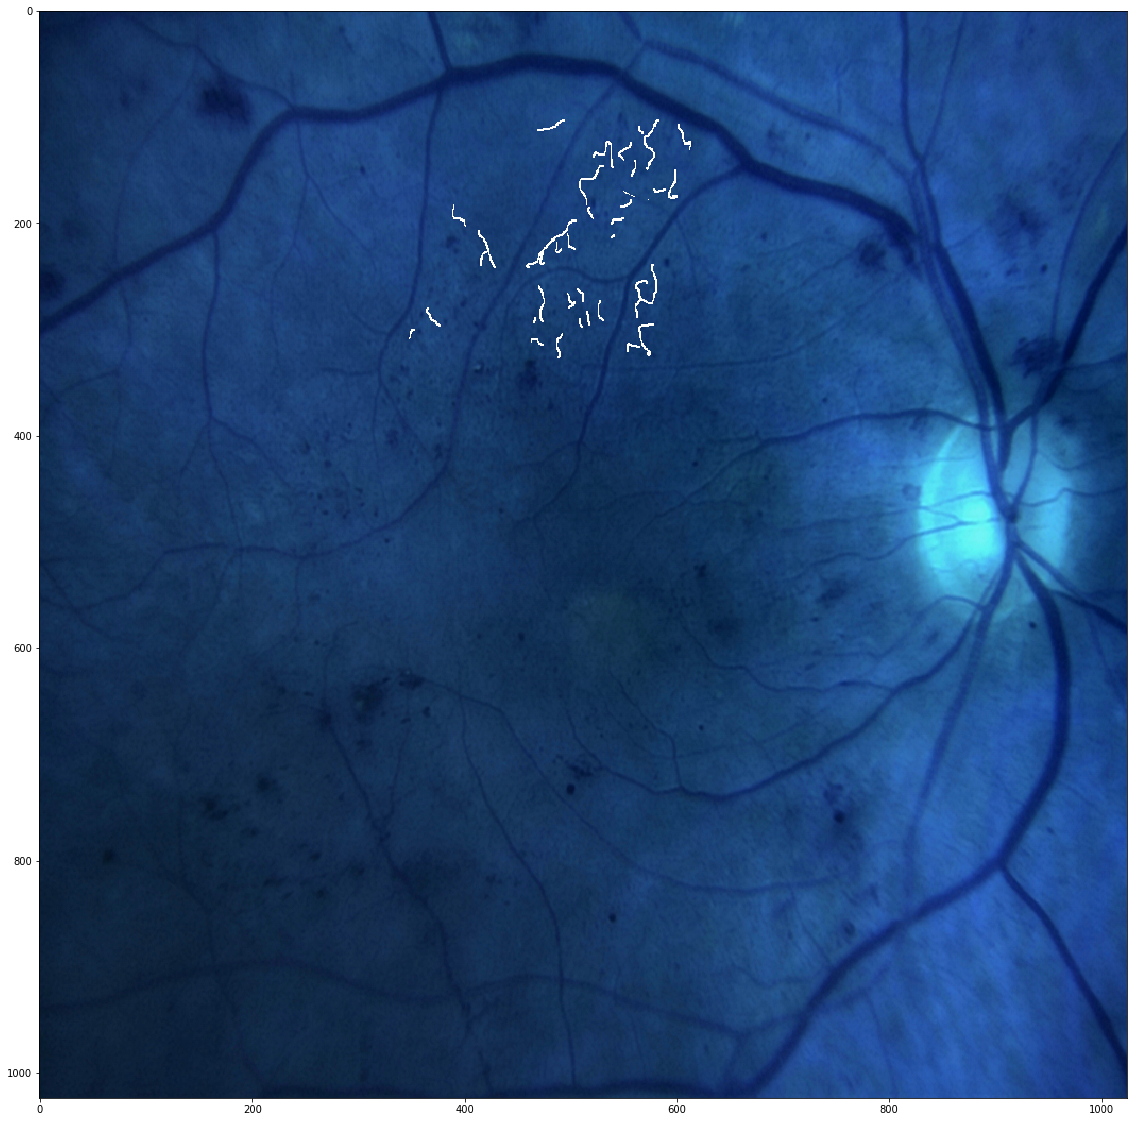

In [140]:
i = 2
v_img = (y[i] == 4) * 255
v_img = np.concatenate((v_img[:, :, np.newaxis], v_img[:, :, np.newaxis], v_img[:, :, np.newaxis]), axis=2)
plt.figure(figsize=(30, 20))
plt.imshow(x[i] + v_img)

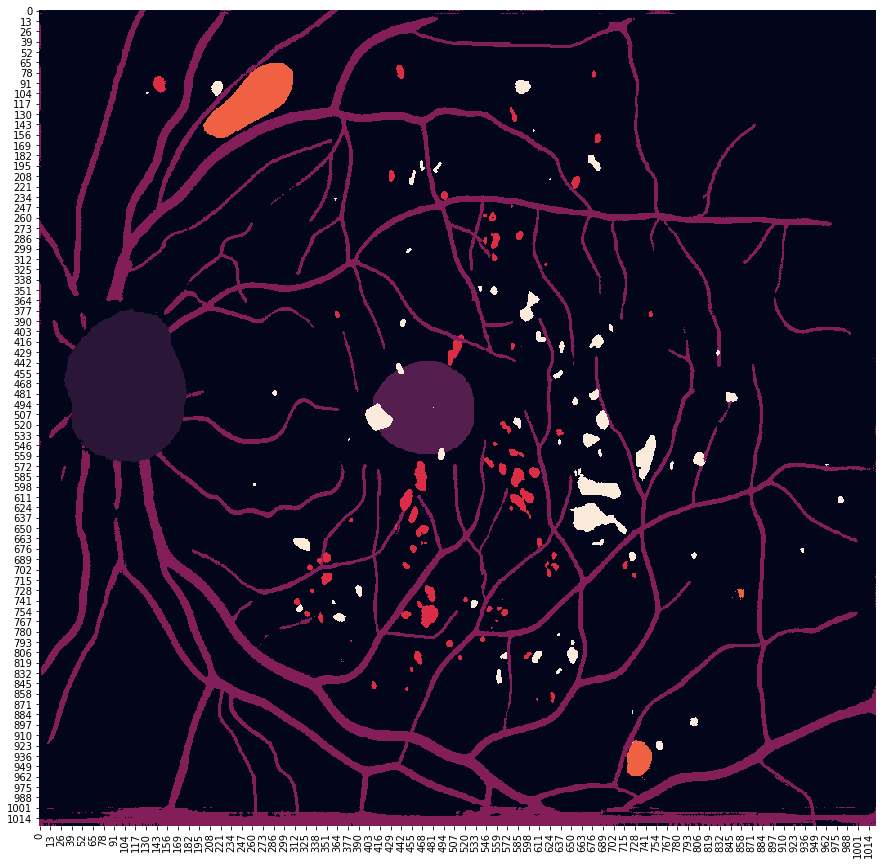

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(validated_images[1], cbar=False)